Forage\n
ANZ\n
Predictive Analytics\n
Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

The relevant dataset is linked below for you. 
For this task, you’ll likely need to use statistical software such as R, SAS, or Python.

Using the same transaction dataset, identify the annual salary for each customer

Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

importing libraries and data

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data_file = 'data.csv'
df = pd.read_csv (data_file)

Selecting data and data cleansing >> 

In [33]:
df=df[df["txn_description"]=="PAY/SALARY"]

df.drop(['customer_id','transaction_id','long_lat','merchant_code','currency','movement','extraction','bpay_biller_code','gender','country','merchant_long_lat','status','card_present_flag','merchant_suburb','merchant_state','date','txn_description','first_name','merchant_id'],axis='columns', inplace=True)
print(df.head())


        account   balance  age   amount
0  ACC-37709441  23990.99   18  4132.23
1  ACC-37709441  20639.81   18  4132.23
2  ACC-37709441  17139.54   18  4132.23
3  ACC-37709441  14022.13   18  4132.23
4  ACC-37709441  10631.69   18  4132.23


Inspecting data

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 12020
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   account  883 non-null    object 
 1   balance  883 non-null    float64
 2   age      883 non-null    int64  
 3   amount   883 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 34.5+ KB
None


In [35]:
print(df.describe().round(2))

         balance     age   amount
count     883.00  883.00   883.00
mean    16242.86   32.63  1898.73
std     30953.34   12.28  1150.36
min       735.66   18.00   576.00
25%      4310.00   22.00  1013.67
50%      7532.54   30.00  1626.48
75%     14370.76   40.00  2538.68
max    267128.52   78.00  8835.98


Correlation Mattrix

In [36]:
corr=df.corr().round(2)
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
         balance   age  amount
balance     1.00  0.19    0.29
age         0.19  1.00   -0.14
amount      0.29 -0.14    1.00


Scatterplots

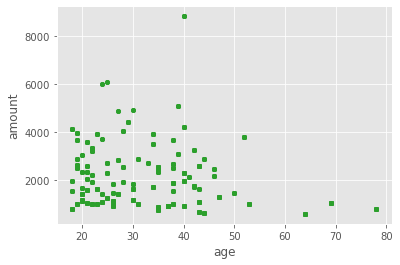

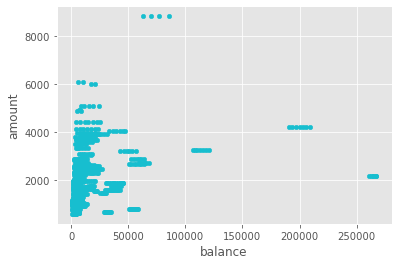

In [20]:
plt.style.use('ggplot')
df.plot(
    kind='scatter',
    x='age',
    y='amount',
    c='#2ca02c'
)
df.plot(
    kind='scatter',
    x='balance',
    y='amount',
    c='#17becf'
)
plt.show()

array([[<AxesSubplot:title={'center':'amount'}>]], dtype=object)

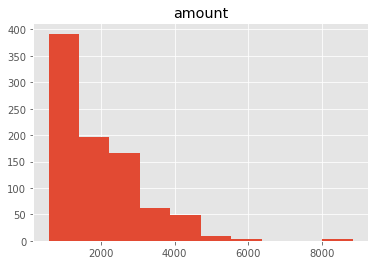

In [21]:
df.hist('amount')

Applying Linear Regression

In [24]:
X2=df[['age','balance']]
Y=df['amount']
X_tr,X_ts,Y_tr,Y_ts=train_test_split(X2,Y,test_size=0.3,random_state=1)
model=LinearRegression()
model.fit(X_tr,Y_tr)
Y_predicted=model.predict(X_ts)

print("\n\nMean Squared Error>> ",mean_squared_error(Y_ts,Y_predicted).round(2))
print("Model Score >>", model.score(X_ts,Y_ts).round(2),"\n\n")



Mean Squared Error>>  999542.3
Model Score >> 0.14 


